In [ ]:
!pip install scipy
!pip install matplotlib
!pip install numpy

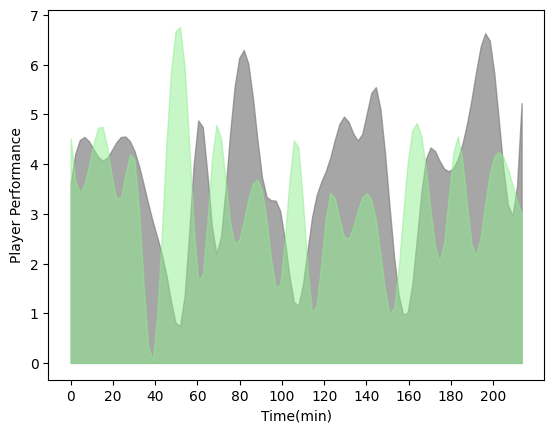

In [170]:
#建立模型
import csv
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d

#把总时间分成几段
fragments = 30
#选择哪一场比赛
Match_id = "2023-wimbledon-1301"
#输出图像清晰度
image_dpi = 300


server =14
victor = 16
match = 1
time = 4
game = 19
set_ = 20

match_data_list = []

with open('Wimbledon_featured_matches_washed.csv', 'r') as file:
    csv_reader = csv.reader(file)
    next(csv_reader, None)
    
    for row in csv_reader:
        if row[match]==Match_id:
            match_data_list.append(row)
     
    #计算时间间隔
    full_time=float(match_data_list[-1][time])
    time_interval = full_time / fragments
    
total_point = len(match_data_list) 
p1_server_win = 0
p1_win = 0
p1_server = 0

p2_server_win = 0
p2_win = 0
p2_server = 0

p1_game_win = 0
p1_game_win_server = 0
p1_game_server = 0

p2_game_win = 0
p2_game_win_server = 0
p2_game_server = 0


for row in match_data_list:
    
    row[time]=float(row[time])
    
    if row[victor] == '1':
        p1_win += 1
        if row[server] == '1':
            p1_server_win += 1
    else:
        p2_win += 1
        if row[server] == '2':
            p2_server_win += 1
            
    if row[server] == '1':
        p1_server += 1
    else:
        p2_server += 1
        
    if row[game] == '1' and row[server] == '1':
        p1_game_server += 1
        p1_game_win += 1
        p1_game_win_server += 1
    if row[game] == '2' and row[server] == '2':
        p2_game_server += 1
        p2_game_win += 1
        p2_game_win_server += 1
    if row[game] == '1' and row[server] == '2':
        p2_game_server += 1
        p1_game_win +=1
    if row[game] == '2' and row[server] == '1':
        p1_game_server += 1
        p2_game_win += 1


p1_game_server_win_pro = (p1_game_win_server / p1_game_server) / ((p1_game_win - p1_game_win_server) / p2_game_server)
p2_game_server_win_pro = (p2_game_win_server / p2_game_server) / ((p2_game_win - p2_game_win_server) / p1_game_server)
#print(p1_game_win,p2_game_win,p1_game_win_server,p2_game_win_server)
#print(p1_game_server_win_pro)
#print(p2_game_server_win_pro)
    
p1_server_win_pro = (p1_server_win / p1_server) / ((p1_win - p1_server_win) / p2_server)
p2_server_win_pro = (p2_server_win / p2_server) / ((p2_win - p2_server_win) / p1_server)
#print(p1_server_win_pro)
#print(p2_server_win_pro)

p1_score_list = []
p2_score_list = []
current_time = time_interval
p1_win = 0
p2_win = 0
total_balls = 0
delete_number = 0


for row in match_data_list:
    if row[time] < current_time-0.5:
        total_balls = total_balls + 1
        
        if row[victor] == '1':
            if row[server] == '1':
                p1_win += 1 / p1_server_win_pro 
            else:
                p1_win += 1
        else:
            if row[server]== '2':
                p2_win = p2_win + 1 / p2_server_win_pro
            else:
                p2_win += 1
                
        if row[game] == '1':
            if row[server] == '1':
                p1_win += 1 / p1_game_server_win_pro
            else:
                p1_win += 1
        elif row[game] == '2':
            if row[server] == '2':
                p2_win += 1 / p2_game_server_win_pro
            else:
                p2_win += 1
                
        if row[set_] == '1':
            p1_win += 1
        elif row[set_] == '2':
            p2_win += 1
            
    else:
        if total_balls == 0:
            #p1_score_list.append(0.5)
            #p2_score_list.append(0.5) 
            delete_number += 1
        else:
            p1_score_list.append(p1_win)
            p2_score_list.append(p2_win)
            #p1_score_list.append(p1_win/total_balls)
            #p2_score_list.append(p2_win/total_balls)
        current_time = current_time + time_interval
        p1_win = 0
        p2_win = 0
        total_balls = 0


#p1_score_list.append(p1_win/(p1_win+p2_win))
#p2_score_list.append(p2_win/(p1_win+p2_win))
#print(p1_score_list)
#print(p2_score_list)


time_points = range(fragments - delete_number)
real_time_points = [ x * time_interval for x in time_points]

p1 = interp1d(real_time_points,p1_score_list, kind='cubic')
p2 = interp1d(real_time_points,p2_score_list, kind='cubic')

#plt.plot(real_time_points, p1_score_list, label='Player 1', )
#plt.plot(real_time_points, p2_score_list, label='Player 2', )

new_time_points = np.linspace(0,real_time_points[-1],100)
new_p1_score_list_unsolved = p1(new_time_points)
new_p2_score_list_unsolved = p2(new_time_points)

new_p1_score_list = [x if x >= 0 else 0 for x in new_p1_score_list_unsolved]
new_p2_score_list = [x if x >= 0 else 0 for x in new_p2_score_list_unsolved]

#plt.fill_between(real_time_points, fill_color, color='gray', alpha=0.5)
plt.fill_between(new_time_points, 0 ,new_p1_score_list, color='grey', alpha=0.7)
plt.fill_between(new_time_points, 0 , new_p2_score_list, color='lightgreen', alpha=0.5)
#plt.fill_between(real_time_points, p1_score_list, p2_score_list, color='lightgreen', alpha=0.5)

plt.xlabel('Time(min)')
plt.ylabel('Player Performance')
plt.xticks(range(int(min(real_time_points)), int(max(real_time_points)+1), 20))

plt.savefig(Match_id + '.png',dpi=image_dpi)
#plt.legend()
plt.show()

In [166]:
p1_score_list = []
p2_score_list = []
current_time = time_interval
p1_win = 0
p2_win = 0
total_balls = 0
delete_number = 0


for row in match_data_list:
    if row[time] < current_time-0.5:
        total_balls = total_balls + 1
        
        if row[victor] == '1':
            if row[server] == '1':
                p1_win += 1 / p1_server_win_pro 
            else:
                p1_win += 1
        else:
            if row[server]== '2':
                p2_win = p2_win + 1 / p2_server_win_pro
            else:
                p2_win += 1
                
        if row[game] == '1':
            if row[server] == '1':
                p1_win += 1 / p1_game_server_win_pro
            else:
                p1_win += 1
        elif row[game] == '2':
            if row[server] == '2':
                p2_win += 1 / p2_game_server_win_pro
            else:
                p2_win += 1
                
        if row[set_] == '1':
            p1_win += 1
        elif row[set_] == '2':
            p2_win += 1
            
    else:
        if total_balls == 0:
            #p1_score_list.append(0.5)
            #p2_score_list.append(0.5) 
            delete_number += 1
        else:
            p1_score_list.append(p1_win)
            p2_score_list.append(p2_win)
            #p1_score_list.append(p1_win/total_balls)
            #p2_score_list.append(p2_win/total_balls)
        current_time = current_time + time_interval
        p1_win = 0
        p2_win = 0
        total_balls = 0


#p1_score_list.append(p1_win/(p1_win+p2_win))
#p2_score_list.append(p2_win/(p1_win+p2_win))
print(p1_score_list)
print(p2_score_list)

[5.30065876766219, 1.0672268907563025, 1.6008403361344539, 3.767045322284038, 3.3006587676621892, 1.233431876905887, 0.5336134453781513, 2.767045322284038, 2.834272213040341, 5.067226890756302, 3.3006587676621892, 3.767045322284038, 2.233431876905887, 2, 3.3006587676621897, 2.3006587676621897, 3.767045322284038, 3.367885658418492, 4, 2.0672268907563023, 1.6998184315277358, 0, 3.3006587676621897, 5, 3.233431876905887, 2.3006587676621897, 4.834272213040341, 2.6008403361344534]
[2.5054910899295484, 6.5758482697886445, 5.081339359718193, 3.0813393597181937, 4.081339359718194, 3.0813393597181933, 0, 3.516473269788645, 3.564866089929548, 3, 3.0813393597181933, 3.0813393597181933, 0, 0.5054910899295483, 1.0109821798590966, 4.646205449647741, 1.0109821798590966, 4.564866089929549, 1.0109821798590966, 1.5758482697886447, 2, 1.0109821798590966, 1.575848269788645, 1.0109821798590966, 2.516473269788645, 4.081339359718193, 4.070357179859096, 3.5868304496477417]


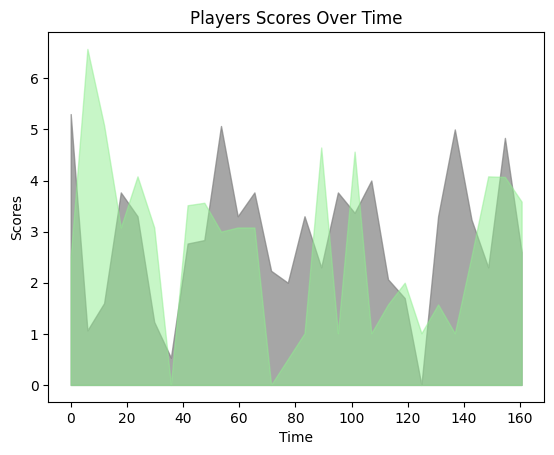

In [167]:
import matplotlib.pyplot as plt
import numpy as np


time_points = range(fragments-delete_number)
real_time_points = [ x * time_interval for x in time_points]


#plt.plot(real_time_points, p1_score_list, label='Player 1', )
#plt.plot(real_time_points, p2_score_list, label='Player 2', )


#fill_color = np.minimum(p1_score_list, p2_score_list)
#plt.fill_between(real_time_points, fill_color, color='gray', alpha=0.5)
plt.fill_between(real_time_points, 0 ,p1_score_list, color='grey', alpha=0.7)
plt.fill_between(real_time_points, 0 , p2_score_list, color='lightgreen', alpha=0.5)
#plt.fill_between(real_time_points, p1_score_list, p2_score_list, color='lightgreen', alpha=0.5)

plt.title('Players Scores Over Time')
plt.xlabel('Time')
plt.ylabel('Scores')
plt.xticks(range(int(min(real_time_points)), int(max(real_time_points)+1), 20))

#plt.legend()
plt.show()

In [85]:
import csv

header = ['p1_score', 'p2_score', 'time_points', 'p1-p2','p2-p1']
x = [a - b for a, b in zip(p1_score_list, p2_score_list)]
y = [b - a for a, b in zip(p1_score_list, p2_score_list)]

csv_filename = 'output_data_test_1.csv'


with open(csv_filename, 'w', newline='') as csvfile:
    csv_writer = csv.DictWriter(csvfile, fieldnames=header)

    csv_writer.writeheader()
    
    for row in zip(p1_score_list,p2_score_list,real_time_points,x,y):
        csv_writer.writerow(dict(zip(header, row)))

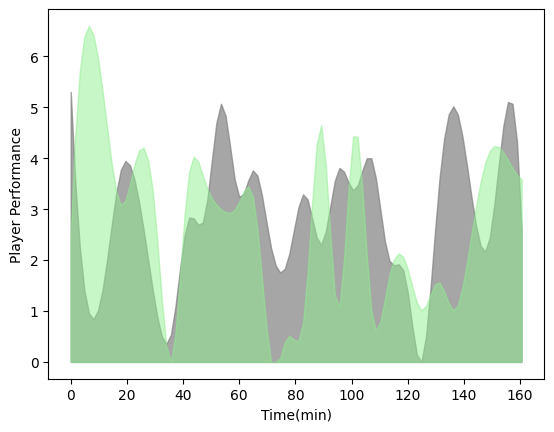

In [168]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d


time_points = range(fragments - delete_number)
real_time_points = [ x * time_interval for x in time_points]

p1 = interp1d(real_time_points,p1_score_list, kind='cubic')
p2 = interp1d(real_time_points,p2_score_list, kind='cubic')

#plt.plot(real_time_points, p1_score_list, label='Player 1', )
#plt.plot(real_time_points, p2_score_list, label='Player 2', )

new_time_points = np.linspace(0,real_time_points[-1],100)
new_p1_score_list_unsolved = p1(new_time_points)
new_p2_score_list_unsolved = p2(new_time_points)

new_p1_score_list = [x if x >= 0 else 0 for x in new_p1_score_list_unsolved]
new_p2_score_list = [x if x >= 0 else 0 for x in new_p2_score_list_unsolved]

#plt.fill_between(real_time_points, fill_color, color='gray', alpha=0.5)
plt.fill_between(new_time_points, 0 ,new_p1_score_list, color='grey', alpha=0.7)
plt.fill_between(new_time_points, 0 , new_p2_score_list, color='lightgreen', alpha=0.5)
#plt.fill_between(real_time_points, p1_score_list, p2_score_list, color='lightgreen', alpha=0.5)

plt.xlabel('Time(min)')
plt.ylabel('Player Performance')
plt.xticks(range(int(min(real_time_points)), int(max(real_time_points)+1), 20))

#plt.legend()
plt.show()